In [1]:
import warnings
warnings.filterwarnings('ignore')

from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import glob 
import aplpy
from tqdm.auto import tqdm
from astropy.utils.console import ProgressBar

import sys
sys.path.append('/Users/abarnes/GitHub/misc/data_cube_analysis/')

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 


import getdata
import moments
import rms
import masks

In [3]:
inputfiles = ['./CloudH_HCN_L22-merged_K_kms.fits']
inputfile = inputfiles[0]

In [4]:
cloud = inputfile.split('/')[-1].split('_')[0]
hdu = fits.open(inputfile)[0]
cube = getdata.get_cube(hdu)
cube

SpectralCube with shape=(758, 640, 384) and unit=K:
 n_x:    384  type_x: RA---ARC  unit_x: deg    range:   284.263670 deg:  284.300806 deg
 n_y:    640  type_y: DEC--ARC  unit_y: deg    range:     2.147597 deg:    2.209509 deg
 n_s:    758  type_s: VRAD      unit_s: km / s  range:      -39.890 km / s:     120.165 km / s

In [12]:
cube[0].hdu

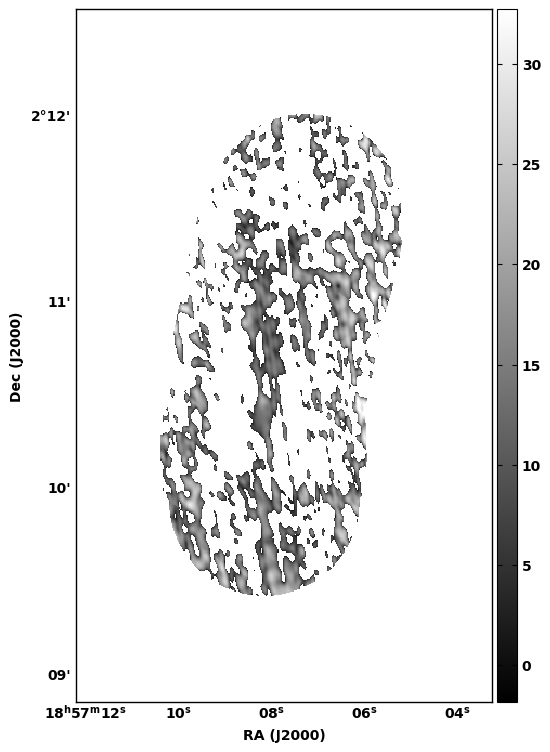

In [5]:
cube.linewidth_sigma().quicklook()

In [3]:
mom_velocitydict = {'cloudH': np.array([35, 55])}
rms_velocitydict = {'cloudH': np.array([[-200, 30], [60, 200]])}

for inputfile in tqdm(inputfiles):

    cloud = inputfile.split('/')[-1].split('_')[0]
    hdu = fits.open(inputfile)[0]
    cube = getdata.get_cube(hdu)
    rms_map = rms.get_rmsrob(cube)
    hdu_mapmask = fits.PrimaryHDU(~np.isnan(rms_map.data)*1, rms_map.header)

    mask = masks.get_expmask(cube, rms_map, hthresh=3, lthresh=2, beamarea=1, npix=3)
    cube_masked = cube.with_mask(mask)
    velo = np.array([-200,150])

    moms = moments.get_momentmaps(cube_masked, rms_map, mom_velocitydict['cloudH'], velomoms=True)
    # makeplot(moms, hdu_msd, hdu_mapmask, inputfile)

    # outputfile = inputfile.replace(inputdir, './../mom_28').replace('.fits', '')
    # rms_map.writeto('%s_rms.fits' %outputfile, overwrite=True)
    # moms['mom0'].writeto('%s_mom.fits' %outputfile, overwrite=True)
    # moms['max'].writeto('%s_max.fits' %outputfile, overwrite=True)
    # moms['mom0s2n'].writeto('%s_mom0s2n.fits' %outputfile, overwrite=True)

  0%|          | 0/1 [00:00<?, ?it/s]

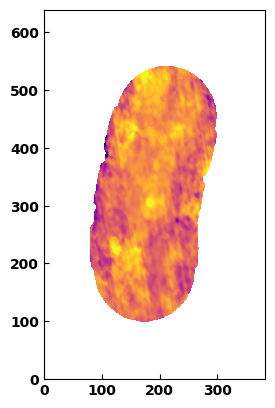

In [5]:
plt.imshow(moms['sigma'].data, origin='lower', cmap='plasma', vmin=3, vmax=5)